In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [8]:
data=pd.read_csv("D:/SEM-5/ML/Assignments/My Codes/Market_Basket_Optimisation.csv",header=None)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#step2 :generate list of transaction
transactions=[]
for i in range(0,data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan']
    transactions.append(transaction)

In [14]:
# Step 3: Convert transactions to a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_data=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_data,columns=te.columns_)

In [15]:
# Step 4: Train the Apriori algorithm
frequent_itemsets=apriori(df,min_support=0.01,use_colnames=True)

In [18]:
# Step 5: Extract association rules
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.2)

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [20]:
# Display rules
print("Generated Association Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']])

Generated Association Rules:


C:\Users\Hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Hp\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Hp\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'rules' is not defined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


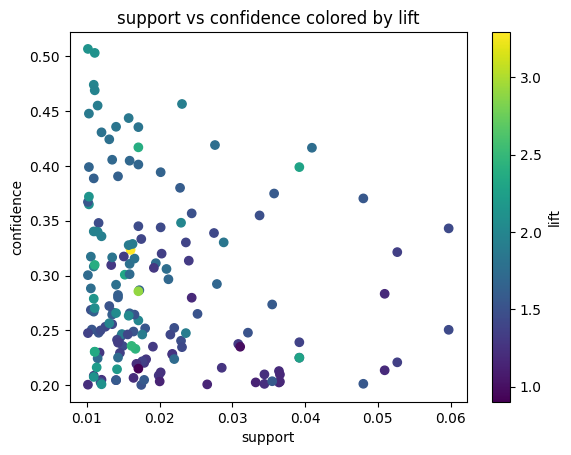

In [13]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'],rules['confidence'],c=rules['lift'],cmap='viridis')
plt.colorbar(label='lift')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence colored by lift')
plt.show()